# <font color='#88d8b0'>Trip Advisor Hotel Review Sentiments prediction and review rating prediction</font>

![]()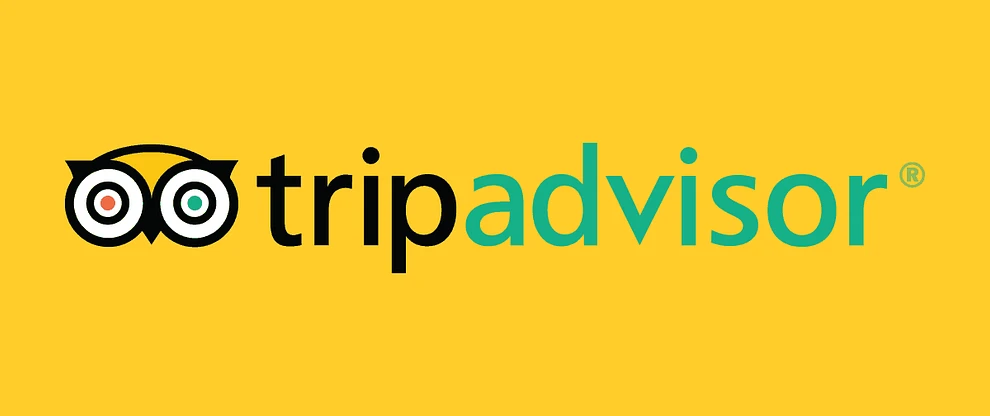

# <font color='#ffcc5c'>Agenda</font>

*  [About this notebook](#About-this-notebook)
*  [Import of data](#Import-of-data)
* [Adding basic Features](#Adding-basic-Features)
* [Data cleaning](#Data-cleaning)
*  [Text preprocessing](#Text-preprocessing)
* [Data Visualization](#Data-Visualization)
*  [Emotions](#NCRLex)
* [BERT model using k train](#BERT-Ktrain-model-to-predict-the-review-rating)
*  [Reference](#Reference)


# <font color='#ffcc5c'>About this notebook</font>

##### <font color='#1ebbd7'>This notebook aims to predict the Trip Advisor Hotel Review Sentiments and review rating with the given hotel review further to that we have some text data analysis like bigram and trigram with some text length distribution to see some insight and we have some future Engineering with text using Vader from NLTK package and we have NRC lexicon which explores the emotions affects in the review text. for prediction part, we are using TFIT that term frequency and document frequency to predict the review sentiment.</font>

* Predict Review Rating



#### [Back to Agenda](#Agenda)

In [ ]:
# import of packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from IPython.display import HTML

In [ ]:
pip install NRClex

In [ ]:
from nrclex import NRCLex


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

# <font color='#ffcc5c'>Import of data</font>



#### [Back to Agenda](#Agenda)

In [ ]:
df = pd.read_csv('../input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv')

In [ ]:
df.head()

In [ ]:
# checking for blanks

blanks =[]

#index, review, review rating.
for i,rv,rat in df.itertuples():
    if rv.isspace():
        blanks.append(i)


In [ ]:
blanks

In [ ]:
# checking for null values

df.isnull().sum()

#  <font color='#ffcc5c'>Data cleaning</font>



#### [Back to Agenda](#Agenda)

In [ ]:
import re

def  clean_text(text):
    """
    Fuction to clean the text data
    * symbols
    * change to lower_case
    """
    text = text.str.lower()
    text = text.apply(lambda T: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", T))  
        
    return text

In [ ]:
df['Review']= clean_text(df['Review'])

In [ ]:
df['Review'] = df['Review'].str.replace('#','')

In [ ]:
df.head()

# <font color='#ffcc5c'>Text preprocessing</font>




Test preprocessing is most important part of any NLP machine learning proces and it is removing any noise out of the detail need to concentrate
Tokenization(chopping text into each individual word)

* Removing stop words(stop word are extremely common words “the”, “is” and “and”)

* Normalization of words (USA has more foams like U.S., United States and so we eliminate data redundancy(repetition)

* Lemmatization (turn the words to base form for example: cars, car's should become car)




#### [Back to Agenda](#Agenda)

In [ ]:
# packages for text preprocesing

import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None # ignoring the warning

In [ ]:
# text to lower case

df['Review'] = df['Review'].str.lower()

In [ ]:
# Removing Punctuation

punk_Remove = string.punctuation

def del_punk(text):
    """
    function to remove the Punctuation
    """
    return text.translate(str.maketrans('','',punk_Remove))

df['text_no_punk'] = df['Review'].apply(lambda T: del_punk(T))
df.head(2)

In [ ]:
# removal of stopwords


from nltk.corpus import stopwords

Fre_word = set(stopwords.words('english'))

def del_stopwords(text):
    """
    function to remove the stopwords
    """
    return " ".join([word for word in str(text).split() if word not in Fre_word])

df['text_no_stopword'] = df['text_no_punk'].apply(lambda T: del_stopwords(T))

df.head(2)

In [ ]:
# most frequent words

from collections import Counter

count = Counter()

for text in df['text_no_stopword'].values:
    for word in text.split():
        count[word] = count[word] + 1

count.most_common(10)

In [ ]:
# Removing most Frequent words

Freq_word = set([i for (i, ic) in count.most_common(10)])


def del_freq_word(text):
    """
    This function will remove the frequent words
    
    """
    return " ".join([word for word in str(text).split() if word not in Freq_word])

df['text_no_freqword'] = df['text_no_stopword'].apply(lambda text: del_freq_word(text))

df.head(2)

In [ ]:
# Removal of Rare words

rare_word = 10

Rarewords = set([i for (i, ic) in count.most_common()[:-rare_word:-1]])

def del_rarewords(text):
    """
    function to remove the rare words
    """
    return " ".join([word for word in str(text).split() if word not in Rarewords])



df['text_no_Rareword'] = df['text_no_freqword'].apply(lambda T: del_rarewords(T))

In [ ]:
#  Lemmatization (turn the words to base form for example: cars, car's should become car)

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_m = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}


def lemmat_pos_word(text):
    
    pos_tagger_text = nltk.pos_tag(text.split())
    
    return " ".join([lemmatizer.lemmatize(word, wordnet_m.get(pos[0],wordnet.NOUN)) for word,pos in pos_tagger_text])



df['lemma_text'] = df['text_no_Rareword'].apply(lambda T : lemmat_pos_word(T))

df.head(2)

In [ ]:
# removal of Urls

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

df['text_no_urls'] = df['lemma_text'].apply(lambda T : remove_html(T))

df.head(2)

In [ ]:
# Removal of Emojis

# Reference :https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b


def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


df['text'] = df['text_no_urls'].apply(lambda T : remove_emoji(T))

df.head(2)

In [ ]:
# drop of all other columns except rating and text review

df.columns

In [ ]:
df.drop(['Review', 'text_no_punk', 'text_no_stopword',
       'text_no_freqword', 'text_no_Rareword', 'lemma_text', 'text_no_urls'],axis= 1,inplace = True)

In [ ]:
df['Rating'].unique()

In [ ]:
df.head()

# <font color='#ffcc5c'>Adding basic Features</font>



#### [Back to Agenda](#Agenda)

# VADER

A SentimentAnalyzer is a tool to implement and facilitate Sentiment Analysis tasks using NLTK features and classifiers, especially for teaching and demonstrative purposes.

In [ ]:
df['scores'] = df['text'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')



In [ ]:
df['number_of_words'] = df['text'].str.split().apply(lambda x: len(x))

In [ ]:
df.head(2)

# <font color='#ffcc5c'>Data Visualization</font>


#### [Back to Agenda](#Agenda)

In [ ]:

dist_t1 = df[df['Rating'] == 1]['number_of_words']
dist_t2 = df[df['Rating'] == 2]['number_of_words']
dist_t3 = df[df['Rating'] == 3]['number_of_words']
dist_t4 = df[df['Rating'] == 4]['number_of_words']
dist_t5 = df[df['Rating'] == 5]['number_of_words']

fig,axes=plt.subplots(1,5,figsize=(18,5))

sns.set_context(context='notebook',font_scale=1)
sns.set_style('darkgrid')

sns.distplot(dist_t1,color='#ee4035',bins=10,kde=False,ax=axes[0]);
sns.distplot(dist_t2,color='#f37736',bins=10,kde=False,ax=axes[1]);
sns.distplot(dist_t3,color='#fdf498',bins=10,kde=False,ax=axes[2]);
sns.distplot(dist_t4,color='#7bc043',bins=10,kde=False,ax=axes[3]);
sns.distplot(dist_t5,color='#0392cf',bins=10,kde=False,ax=axes[4]);

axes[0].set_title("1 start rating");
axes[1].set_title("2 start rating");
axes[2].set_title("3 start rating");
axes[3].set_title("4 start rating");
axes[4].set_title("5 start rating");

plt.tight_layout()

In [ ]:
#let see what we have in the words
import spacy

nlp = spacy.load('en_core_web_sm')



hastag_token = ''

for words in df[df['Rating']== 1]['text'].value_counts().index[0:50]:
    hastag_token += words

doc1 = nlp(hastag_token)

In [ ]:
from spacy import displacy


displacy.render(doc1, style='ent',jupyter=True)

#  using spacy-displacy analysing the one start rating review words 

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.set_context(context='notebook',font_scale=1.5)
sns.countplot(x='Rating',data=df,palette='viridis');
plt.title('Hotel Review Rating count for each start rating');

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.set_context(context='notebook',font_scale=1.5)
sns.boxplot(x='Rating',y='number_of_words',data=df,palette='rainbow');
plt.title('Text lenght for each star category');

In [ ]:
plt.figure(figsize=(9,6))
sns.set_style('darkgrid')
sns.set_context(context='notebook',font_scale=1.5)
sns.countplot(x='comp_score',data=df,palette='Set2');
plt.title('overall Positive and Negative sentiments');

In [ ]:
review_rating = df.groupby('Rating').mean()
review_rating

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.set_context(context='notebook',font_scale=1.5)
sns.barplot(y='number_of_words',x=review_rating.index,data=review_rating,palette='rainbow');
plt.title('Average number of words in each type of star rating');

# NCRLex

NRCLex will measure emotional affect from a body of text. Affect dictionary contains approximately 27,000 words, and is based on the National Research Council Canada (NRC) affect lexicon.
http://sentiment.nrc.ca/lexicons-for-research/

In [ ]:
def Review_emo(word):
    """
    Function to convert the raw data to utf-8 formate
    * remove stopwords
    * convert to data Frame
    
    """
    word = [word for word in word if word not in stopwords.words('english')]
    word = str([cell.encode('utf-8') for cell in word])# to convert the text into utf-8 unicode
    str_text = NRCLex(word) 
    str_text = str_text.raw_emotion_scores
    str_text = pd.DataFrame(str_text,index=[0])
    str_text = pd.melt(str_text)
    str_text.columns = ('Emotions','Count')
    str_text = str_text.sort_values('Count')
    
    return str_text



In [ ]:
rating_clean = Review_emo(df['text'])

In [ ]:
# emotional affects plot


plt.figure(figsize=(9,6))
sns.set_style('darkgrid')
sns.set_context(context='notebook',font_scale=1.5)
sns.barplot(y ='Emotions',x='Count', data = rating_clean[0:8] ,palette='viridis_r');
plt.title('Emotions in the Review');

In [ ]:
from wordcloud import WordCloud, STOPWORDS

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df['text']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1900, height = 1500, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = '#40e0d0') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('high frequency words in Hotel Reviews')  
plt.show() 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.set_context(context='notebook',font_scale=1.5)
Unigram_word = text_ngrams(df.text,10,1)
Unigram_word = dict(Unigram_word)
sns.barplot(x=list(Unigram_word.values()),y=list(Unigram_word.keys()),palette = 'rainbow');
plt.title('Unigram Analysis');

In [ ]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.set_context(context='notebook',font_scale=1.5)
Unigram_word = text_ngrams(df.text,10,2)
Unigram_word = dict(Unigram_word)
sns.barplot(x=list(Unigram_word.values()),y=list(Unigram_word.keys()),palette = 'rainbow');
plt.title('Bigram Analysis');

In [ ]:
# Trigram analysis for one star rating

plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.set_context(context='notebook',font_scale=1.5)
Unigram_word = text_ngrams(df[df['Rating']==1]['text'],10,3)
Unigram_word = dict(Unigram_word)
sns.barplot(x=list(Unigram_word.values()),y=list(Unigram_word.keys()),palette = 'rainbow');
plt.title('Trigram analysis for one star rating');

### Trigram analysis for one star rating


#### It shows the hints of the problems

* problem with Air condition in the hotel room

* credit card charges for the hotel room booking

* 20 minute of waiting time





In [ ]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.set_context(context='notebook',font_scale=1.5)
Unigram_word = text_ngrams(df[df['Rating']==5]['text'],10,3)
Unigram_word = dict(Unigram_word)
sns.barplot(x=list(Unigram_word.values()),y=list(Unigram_word.keys()),palette = 'rainbow');
plt.title('Trigram analysis for five star rating');

# Trigram analysis for five star shows

#### what made customer happy in hotel stay

* Flat screen tv in the hotel room
* Free internet access in the hotel room
* walk away distance from the public transport


# <font color='#ffcc5c'>Machine learning model</font>



#### [Back to Agenda](#Agenda)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df['text']

In [ ]:
y= df['comp_score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [ ]:
review_text = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

In [ ]:
review_text.fit(X_train,y_train)

In [ ]:
predictions = review_text.predict(X_test)

In [ ]:
from sklearn.metrics import  classification_report, accuracy_score

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
print(accuracy_score(y_test,predictions))

# <font color='#ffcc5c'>BERT-Ktrain model to predict the review rating</font>



#### [Back to Agenda](#Agenda)

#### ktrain is a wrapper for TensorFlow Keras that makes deep learning and AI more accessible and easier to apply

https://pypi.org/project/ktrain

In [ ]:
!pip install ktrain

In [ ]:
import ktrain
from ktrain import text

In [ ]:
label = {1: 0,2: 1,3: 2,4: 3,5: 4}
        
cate = df['Rating'].copy()
cate.replace(label, inplace=True)

In [ ]:
df['Rating']= cate

In [ ]:
# spliting the data into train and test

df['split'] = np.random.randn(df.shape[0], 1)

mn = np.random.rand(len(df)) <= 0.7

train = df[mn]
test = df[~mn]

In [ ]:
# ktrain preprocess

(X_train,y_train),(X_test,y_test),preprocess = text.texts_from_df(train_df = train,
                   text_column ='text',
                  label_columns = 'Rating',
                  val_df = test,
                  maxlen = 200,
                  preprocess_mode ='bert')

In [ ]:
# model 

model = text.text_classifier(name= 'bert',
                            train_data = (X_train, y_train),
                            preproc = preprocess)

In [ ]:
#  To Get optimal learning Rate

learner = ktrain.get_learner(model = model,
                            train_data = (X_train, y_train),
                            val_data = (X_test,y_test),
                            batch_size = 6)

In [ ]:
#learner.lr_find(max_epochs=4)

In [ ]:
#learner.lr_plot()

In [ ]:
learner.fit_onecycle(lr = 4e-5, epochs =2)

In [ ]:
predictor = ktrain.get_predictor(learner.model, preprocess)

In [ ]:
#  predicting hotel review actual rating 1

hotel_review1_neg = ["Hotel location good environment general room window is closed can not be opened the first day check-in air conditioning is broken especially sultry after negotiation to send us a day of breakfast as compensation result hotel no restaurant is just a two-meter long bar breakfast only a cup of coffee and a piece The bread is especially difficult to eat. The next time you stay, you will choose the same price. You will stay away from the city."]

predictor.predict(hotel_review1_neg)

In [ ]:
#  predicting hotel review rating 1

hotel_review2_neg = ['The rooms are super small. There is barely any room to walk. After a tired day of sightseeing also we did not feel like going back to the room knowing it is so small']

predictor.predict(hotel_review2_neg)



In [ ]:
#  predicting hotel review actual rating 5

hotel_pos = ['Beautiful hotel, incredible service. The front dealing texting service was amazing - so incredibly helpful. Check in and out was easy. We felt safe with all of the covid procedures in place. Gorgeous view of the CN Tower and we got a really great rate!!! Thank you for taking care of us for a little weekend getaway']

predictor.predict(hotel_pos)

# <font color='#ffcc5c'>Reference</font>

* Thanks to SRK for creating very good kernal on NLP Text preprocessing, [link to notebook](https://www.kaggle.com/sudalairajkumar/getting-started-with-text-preprocessing)

* Thanks to  Trigram analysis notebook [Trigram function link](https://www.kaggle.com/madz2000/nlp-using-glove-embeddings-99-87-accuracy)

* [image credit](https://www.competethemes.com/blog/create-site-like-tripadvisor/)




## thanks



#### [Back to Agenda](#Agenda)